## Competence Similarity Calculation

This implementation will, given the right files, construct results that show the distribution of the data science competence market and will individually show a file's distribution of competencies present.

##### NOTE:
This code will only use 1 data set. To enable two datasets uncomment the comment sections starting with *


----------------
Samar Hashemi,

11045035,

Bachelor Artificial Intelligence

In [2]:
# All imports
# Python 3

import os
import numpy as np
import re
import csv
import time
import operator
import matplotlib.pyplot as plt

from nltk import sent_tokenize
from sklearn.decomposition import PCA
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from collections import Counter
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from matplotlib import style
style.use("ggplot")


In [50]:
def tryint(s):
    try:
        return int(s)
    except:
        return s

def alphanum_key(s):
    """ Turn a string into a list of string and number chunks.
        "z23a" -> ["z", 23, "a"]
    """
    return [ tryint(c) for c in re.split('([0-9]+)', s) ]

def sort_(l):
    """ Sort the given list in the way that humans expect.
    """
    l.sort_(key=alphanum_key)

In [3]:
# Obtains all filenames and sort them by name


# Change path to path with files
path = '/home/student/ThesisData/IEEE_data_v0.2/'
filenames = []
for filename in os.listdir(path):
    filenames.append(filename)

# *
#Change path to path with files (if second set is available)
# path2 = '/home/student/ThesisData/Indeed_data_v0.0/'
# filenames2 = []
# for filename in os.listdir(path2):
#     filenames2.append(filename)
# sort_(filenames2) 


    
# Sorts files on titles
sort_(filenames)


In [4]:
# Only IEEE dataset
# Creates dictionary where the key is filenumber
# Value is the text with no whitespaces
# Split by newlines and periods with Regex

sentdictionary = dict()
for i in range(len(filenames)):
    with open(path + filenames[i], 'r') as f:
        text = f.read().lower()
        f.close()
        sentdictionary[i] = re.split(r"(?<!^)\s*[.\n]+\s*(?!$)", text)

# *
# for j in range(len(filenames2)):
#     with open(path2 + filenames2[j], 'r') as g:
#         text = g.read().lower()
#         g.close()
#         sentdictionary[j + len(filenames)] = re.split(r"(?<!^)\s*[.\n]+\s*(?!$)", text)



In [6]:
# Split files into sentences
# Prepare them for Word2Vec model
sentences = []
for i in range(len(filenames)):
    for sentence in sentdictionary[i]:
        sent = []
        sent.append(sentence)
        sentences.append(sent)

# *
# for j in range(len(filenames), len(filenames2)+len(filenames)-1):
#     for sentence in sentdictionary[j]:
#         sent = []
#         sent.append(sentence)
#         sentences.append(sent)
# print(len(sentences))

realsentences = []
for sentence in sentences:
    tokens = word_tokenize(sentence[0])
    realsentences.append(tokens)

In [10]:
# Create Word embedding model

model = Word2Vec(realsentences,window=8, min_count=2)
W = model[model.wv.vocab]

/home/student/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


In [11]:
t = time.time()

model.train(realsentences, total_examples=model.corpus_count, epochs=6)

elapsed = time.time() - t
print(elapsed)

1.5512926578521729


In [15]:
model.save('model-v0.1.bin')

In [13]:
# Find most similar words to a certain word
# Creates usable model

word_vectors = model.wv


In [16]:
# Example functionality
# Find most similar words to a certain word

# word_vectors = model.wv
# word_vectors.most_similar(['use','engineering'])
# word_vectors.similarity('artificial', 'intelligence')
word_vectors.most_similar(['machine'])

[('learning', 0.975829005241394),
 ('statistical', 0.8729550838470459),
 ('vision', 0.8715915679931641),
 ('processing', 0.8606395125389099),
 ('segments', 0.8600909113883972),
 ('signal', 0.8375363349914551),
 ('deep', 0.809394359588623),
 ('artificial', 0.8041590452194214),
 ('mining', 0.8023086190223694),
 ('natural', 0.8015767335891724)]

### Visualisation

The following cell will first transform the 100 dimensional vector to a 2 dimensional representation.
Hereafter Kmeans will apply clustering.
Cluster will be made visible herafter to 

In [17]:
# Some test Taxonomy
taxonomy =  ['python', 'data', 'science', 'radio', 'error', 'analyse', 'programming']

No handles with labels found to put in legend.


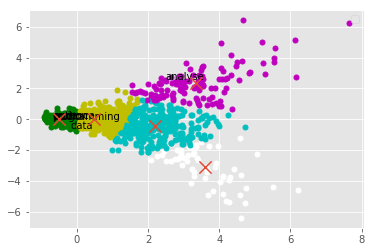

<Figure size 3200x1800 with 0 Axes>

In [18]:
# Transform vectors to 2-dimensions
pca = PCA(n_components=2)
result = pca.fit_transform(W)
result_np = np.array(result)

kmeans = KMeans(n_clusters = 5)
kmeans.fit(result_np)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# print(centroids)
# print(labels)

colors = ["g.","w.","c.","y.", "m."]
word1 = ''
word2 = ''
word3 = ''
word4 = ''
word5 = ''
for i in range(len(result_np)):
#     print("coordinate:",result_np[i], "label:", labels[i])
    plt.plot(result_np[i][0], result_np[i][1], colors[labels[i]], markersize = 10)
    if result_np[i][0] == centroids[0][0] and result_np[i][1] == centroids[0][1]:
        word1 = W[i]
    if result_np[i][0] == centroids[0][0] and result_np[i][1] == centroids[1][1]:
        word2 = W[i]
    if result_np[i][0] == centroids[0][0] and result_np[i][1] == centroids[2][1]:
        word3 = W[i]
    if result_np[i][0] == centroids[0][0] and result_np[i][1] == centroids[3][1]:
        word4 = W[i]
    if result_np[i][0] == centroids[0][0] and result_np[i][1] == centroids[4][1]:
        word5 = W[i]
words = [word1, word2, word3, word4, word5]
plt.scatter(centroids[:, 0],centroids[:, 1], marker = "x", s=150, linewidths = 5, zorder = 10)
plt.annotate(word1, xy=(centroids[0][0], centroids[0][1]))
plt.annotate(word2, xy=(centroids[1][0], centroids[1][1]))
plt.annotate(word3, xy=(centroids[2][0], centroids[2][1]))
plt.annotate(word4, xy=(centroids[3][0], centroids[3][1]))
plt.annotate(word5, xy=(centroids[4][0], centroids[4][1]))

words = list(model.wv.vocab)
for i, word in enumerate(taxonomy):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))

plt.legend()
plt.figure(figsize=(16,9), dpi=200)
plt.savefig('KMeans5.png', dpi=200)
plt.show()

# plt.scatter(result[:, 0], result[:, 1],color = 'red')

# plt.axis([-.8,.25,-0.25,.8])
# plt.show()

### Competence groups

In [19]:
# Data Science Analytics competence requirements
DSDA  = ['data analytics', 'statistical techniques', 'mathematics/statistics', 'discover new relations', 'deliver insights', 'research problem', 'decision-making']
DSDA1 = ['data analytics techniques', 'machine learning','deep learning', 'supervised learning', 'unsupervised learning', 'data mining','nlp', 'predictive analytics','analysis', 'complex data analysis']
DSDA2 = ['apply quantitative techniques', 'statistics', 'calculus', 'time analysis', 'optimization', 'simulation deploy']
DSDA3 = ['identify', 'extract', 'heterogeneous data', 'modern data source', 'social media data', 'open data']
DSDA4 = ['understand performance metrics', 'understand accuracy metrics', 'use performance', 'model validation', 'testing', 'information retrieval']
DSDA5 = ['develop data analytics', 'organizational tasks', 'integrate data analytics', 'agile decisions']
DSDA6 = ['visualization results','critical thinking', 'design', 'evaluate', 'evaluating methods']

# DSDA_comp = [DSDA, DSDA1, DSDA2, DSDA3, DSDA4, DSDA5, DSDA6]
DSDA_comp = {0 : DSDA, 1 : DSDA1, 2 : DSDA2, 3 : DSDA3, 4 : DSDA4, 5 : DSDA5, 6 : DSDA6}

In [20]:
# Data Science Engineering competence requirements
DSENG  = ['engineering principles', 'modern computer technologies', 'research', 'design', 'implement data analytics', 'implement applications', 'develop experiments', 'develop processes', 'develop instruments']
DSENG1 = ['engineering principles', 'research', 'design applications', 'design instruments', 'design applications', 'develop instruments', 'implement instruments', 'implement applications', 'data collection', 'data storage']
DSENG2 = ['develop computational solutions', 'apply computational solutions', 'wide range', 'data analytics platforms', 'big data technologies', 'cloud based']
DSENG3 = ['develop data analysis applications', 'develop tools', 'parallel processing', 'cluster processing', 'cloud based solutions', '']
DSENG4 = ['develop data storage', 'deploy data storage', 'operate data storage', 'hadoop', 'hbase', 'mongodb']
DSENG5 = ['apply security mechanisms', 'apply security controls', 'data processing', 'data privacy', 'protection']
DSENG6 = ['develop relational databases', 'relational databases', 'build relational databases', 'deploy relational databases', 'sql', 'etl','large datasets']

# DSENG_comp = [DSENG, DSENG1, DSENG2, DSENG3, DSENG4, DSENG5, DSENG6]
DSENG_comp = {0 : DSENG, 1 : DSENG1, 2 : DSENG2, 3 : DSENG3, 4 : DSENG4, 5 : DSENG5, 6 : DSENG6}

In [21]:
# Data Science Management competence requirements
DSDM  = ['develop data management', 'implement data management', 'strategy data collection', 'strategy data storage']
DSDM1 = ['develop data strategy', 'implement data strategy','data management policy', 'data management plan']
DSDM2 = ['develop relevant data models', 'implement relevant data models', 'common standards']
DSDM3 = ['integrate heterogeneous data', 'provide heterogeneous data', 'further analysis']
DSDM4 = ['maintain information', 'data handling', 'reference data', 'relevant data sources']
DSDM5 = ['data quality', 'data interoperability', 'compliance standards', 'compliance publication']
DSDM6 = ['develop policies', 'manage policies', 'data protection policies','ethical issues']
DSDM_comp = {0 : DSDM, 1 : DSDM1, 2 : DSDM2, 3 : DSDM3, 4 : DSDM4, 5 : DSDM5, 6 : DSDM6}

In [22]:
# Research Methods and Project Management competence requirements
DSRM  = ['create new understanding', 'create new capabilities', 'scientific method','discover new approaches','create new knowledge','achieve research goals']
DSRM1 = ['create new understanding', 'using research methods', 'experiment', 'evaluation','training','testing']
DSRM2 = ['direct systematic study','understanding observation','discover new approaches','achieve research goals','achieve goals']
DSRM3 = ['domain research model', 'identify data','identify research questions','identify objectives','formulate sound']
DSRM4 = ['perform creative work', 'systematic investigation', 'systematic experimentation', 'discover knowledge','adjust knowledge','derive new applications', 'contribute development']
DSRM5 = ['design experiments', 'data collection', 'not active collection', 'active collection', 'testing', 'problem solving']
DSRM6 = ['develop data driven projects', 'guide data driven projects', 'project planning', 'experiment design', 'data collection', 'handling']
DSRM_comp = {0 : DSRM, 1 : DSRM1, 2 : DSRM2, 3 : DSRM3, 4 : DSRM4, 5 : DSRM5, 6 : DSRM6}

In [23]:
# Domain related Competences (DSDK): Applied to Business Analytics
DSBA  = ['use domain knowledge', 'develop data analytics applications', 'use data science methods', 'domain specific data types', 'domain specific presentations']
DSBA1 = ['information needs', 'assess existing data', 'propose new data', 'identify new data', 'business context','achieve goal', 'social network source', 'open network sources']
DSBA2 = ['operational concepts', 'enable key performance', 'validate business analysis', 'identify potential challenges', 'assess potential challenges']
DSBA3 = ['business focused analysis', 'methods tools', 'identify business impact trends', 'make business case',  'data analysis', 'identified trends']
DSBA4 = ['opportunity', 'propose data', 'process optimization']
DSBA5 = ['customer relations', 'optimize data', 'interaction user groups', 'specific business sectors']
DSBA6 = ['multiple datasets', 'marketing purposes', 'identify effective strategy', 'marketing actions']
DSDK_comp = {0 : DSBA, 1 : DSBA1, 2 : DSBA2, 3 : DSBA3, 4 : DSBA4, 5 : DSBA5, 6 : DSBA6}

In [24]:
# Dictionary that stores all competence groups
dictionaries = [DSDA_comp, DSENG_comp, DSDM_comp, DSRM_comp, DSDK_comp]

In [26]:
# This was done to see if there are spellings mistakes in the competence groups
for dictionaryy in dictionaries:
    for key, comp in dictionaryy.items():
        for sent in comp:
            for word in sent.split():
                if word not in word_vectors:
                    print(word)
                    print(key)

### Calculation Code
Here starts the code for calculating similarities between sentences/files and competence groups.

In [27]:
# The reason why I dont take full line length, is because not every
# word in the line is in the model.
# This function tranfsorms every sentence of a textfile to a vector that
# represents the meaning of the sentence according to the model u give it

# This returns a dictionary for a certain text where every sentence has
# been transformed to a vector that represents the sentence's meaning.
def sentence_meaning(textNumber, dictionary, model, nfeatures):
    sentence_meanings = []
    vector_dict = dict()
    text = dictionary[textNumber]
    for line in text:
        line_length = 0
        vector = np.zeros(nfeatures, dtype='float32')
        for word in line.split():
            if word in model:
                line_length += 1
                vector += model[word]
        if np.all(vector==0) != True:
            vector = vector / line_length
            sentence_meanings.append(vector)
    vector_dict[textNumber] = sentence_meanings
    return vector_dict
# competence_sim(testtext, word_vectors, 100)


# This function transforms all individual competencies to vector
# representation which contanis the meanings of the individual competencies
# Works very fast even with 3 for-loops
def competence_meaning(comp_group, model, nfeatures):
    competence_dict = {}
    # 6 individual competencies per competence group
    # DSDA, DSDA1, DSDA2 ... etc.
    for key, comp in comp_group.items():
        competence_meanings = []
        comp_length = 0
        # Total of 6 - 10 sentences
        for sentences in comp:
            vector = np.zeros(nfeatures, dtype='float32')
            # 2 or 3 words
            for word in sentences:
                if word in model:
                    comp_length += 1
                    vector += model[word]
            vector = vector / comp_length
            competence_meanings.append(vector)
        competence_dict[key] = competence_meanings
    return competence_dict
    


In [28]:
# All sentence_meanings stored in a vector:
sentence_vectors = [sentence_meaning(num, sentdictionary, word_vectors, 100) for num in range(len(filenames))]

# *
# Run this instead if using two seperate data sets
# sentence_vectors = [sentence_meaning(num, sentdictionary, word_vectors, 100) for num in range(len(filenames) + len(filenames2))]



# All Individual competencies meanings stored in a vector:
competence_vectors = [competence_meaning(dictionary_comp, word_vectors, 100) for dictionary_comp in dictionaries]

In [29]:

# Function for getting the max value of a dictionary
def get_max(dictionary):
    return max(dictionary.items(), key=operator.itemgetter(1))[0]


# This provides the similarity results. 
# See thesis for explanation on how the code works if not clear.
def calculate_results(sentences, competencies, threshhold):
    text_class = dict()
    sixth_group = dict()
    comp = []
    for file_id in range(len(sentences)):
        another_dict = {0:0,1:0,2:0,3:0,4:0}
        sentence_number = 0
        for sentence_vec in sentences[file_id][file_id]:
            sentence_number += 1
            comp_dict = dict()
            for comp_group in range(len(competencies)):
                similarity = 0
                count = 0
                for individual_comp in range(len(competencies[comp_group])):
#                     competencies[comp][individual_comp]
                    comp = np.atleast_2d(competencies[comp_group][individual_comp])
                    sent = np.atleast_2d(sentence_vec)
                    cosine = cosine_similarity(comp, sent)[0][0]
                    if cosine > threshhold:
                        similarity += cosine
                        count += 1
                if count != 0:
                    similarity = similarity / count
                    sixth_group[(file_id, sentence_number)] = False
                else:
                    sixth_group[(file_id, sentence_number)] = True
                    similarity = similarity
                comp_dict[comp_group] = similarity

            another_dict[get_max(comp_dict)] += 1
        
        text_class[file_id] = (another_dict)
    return text_class, sixth_group

In [41]:
final_results = calculate_results(sentence_vectors, competence_vectors, (0.55))

Results will differ slightly per newly trained models, therefore load original models in the beginning to retrieve similar results.

In [43]:
results = final_results[0]
sixth_group = final_results[1]
trues = 0
for i in sixth_group.values():
    if i == True:
        trues += 1
print(trues)

6932


### Saving results to files

In [ ]:
# Writes the results to .csv file
with open("results_1_epoch6_cos0.55.csv",'w') as f:
   # Using dictionary keys as fieldnames for the CSV file header
    writer = csv.DictWriter(f, calc[0][0].keys())
    writer.writeheader()
    for d in range(len(calc[0])):
        writer.writerow(results[d])

In [47]:
totals = {'DSDA' : 0, 'DSENG' : 0,
'DSDM' : 0,
'DSRM' : 0,
'DSDK' : 0 ,
'Unseen' : 0}
for i in range(len(results)):
    totals['DSDA'] += results[i][0]
    totals['DSENG'] += results[i][1]
    totals['DSDM'] += results[i][2]
    totals['DSRM'] += results[i][3]
    totals['DSDK'] += results[i][4]
totals['Unseen'] = trues

In [48]:
totals

{'DSDA': 4564,
 'DSDK': 1256,
 'DSDM': 4510,
 'DSENG': 414,
 'DSRM': 297,
 'Unseen': 6932}

In [49]:
# Writing averages to .csv file
with open("average_sentences_2_epoch6_cos0.55.csv",'w') as f:
   # Using dictionary keys as fieldnames for the CSV file header
    writer = csv.DictWriter(f, totals.keys())
    writer.writeheader()
#    for d in range(len(results)):
    writer.writerow(totals)